In [69]:
import pandas as pd
from tqdm.notebook import tqdm
from collections import Counter
from IPython.display import Audio
import pickle
import librosa
import matplotlib.pyplot as plt

tqdm.pandas()

## common voice

In [56]:
path = '/media/data/soroosh/dataset/ASR/cv-fa-6.1/cv-corpus-6.1-2020-12-11/'
val_df = pd.read_table(path + 'fa/validated.tsv')

c = Counter(val_df['client_id'])
speaker_df = val_df[val_df.client_id == c.most_common(1)[0][0]]

clean_df = pd.read_csv(path + 'validated.csv')
clean_df['file'] = clean_df['path'].apply(lambda x: x.split('/')[-1])

df = clean_df[clean_df.file.isin(speaker_df.path)]
df = df[['path', 'sentence', 'duration']].reset_index(drop=True)
print(df['duration'].sum() // 3600)
df.head()

14.0


,path,sentence,duration
0,/media/data/soroosh/dataset/ASR/cv-fa-6.1/cv-c...,ارشام,2.376
1,/media/data/soroosh/dataset/ASR/cv-fa-6.1/cv-c...,خب ما اینجا چی داریم,1.944
2,/media/data/soroosh/dataset/ASR/cv-fa-6.1/cv-c...,اینترنت مطبوعات و رسانه ها تکرار می شود تعیین ...,7.104
3,/media/data/soroosh/dataset/ASR/cv-fa-6.1/cv-c...,بازدید گالری تصاویر چقدر طول می کشد,4.176
4,/media/data/soroosh/dataset/ASR/cv-fa-6.1/cv-c...,دارن دنبال این می گردن,2.904


In [76]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.1)
train_df.to_json('data/train.json', lines=True, orient='records')
val_df.to_json('data/val.json', lines=True, orient='records')
train_df.shape, val_df.shape

((11600, 5), (1289, 5))

In [70]:
alphabet = set()
for s in df['sentence']:
    alphabet.update(list(s))
print(len(alphabet))
# pickle.dump(list(alphabet), open('data/alphabet.pkl', 'wb'))

33


In [71]:
print(sorted(list(alphabet)))

[' ', 'ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ل', 'م', 'ن', 'ه', 'و', 'پ', 'چ', 'ژ', 'ک', 'گ', 'ی']


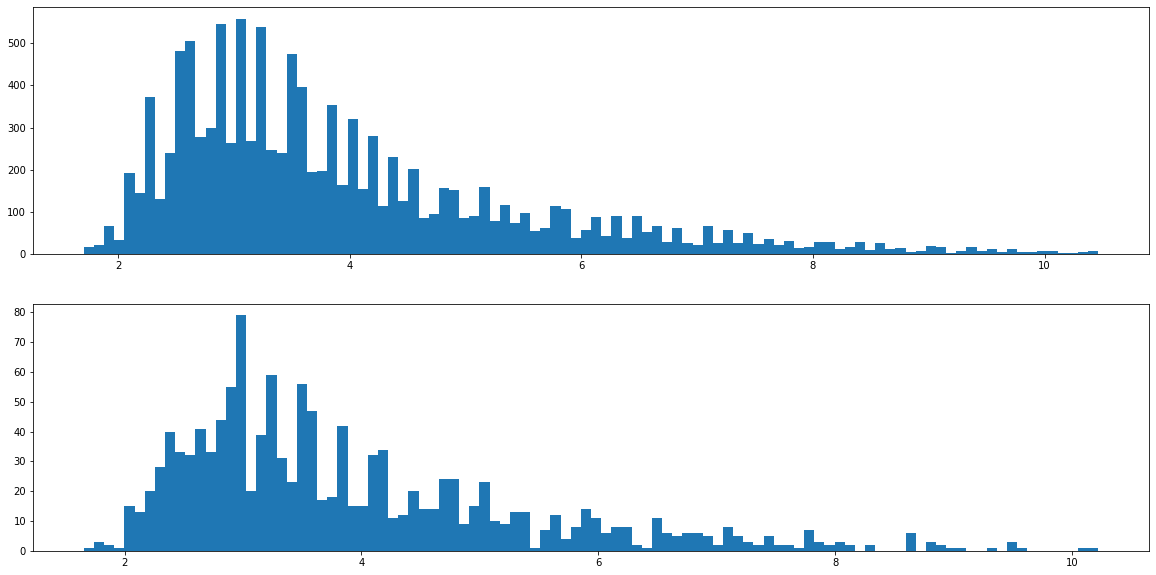

In [77]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.hist(train_df.duration, 100)
plt.subplot(2,1,2)
plt.hist(val_df.duration, 100)
plt.show()

## persian tts

In [79]:
path = '/home/soroosh/data/tts/wavs/'
train_df = pd.read_json('data/persian-tts-train.json', lines=True, orient='records')
test_df = pd.read_json('data/persian-tts-test.json', lines=True, orient='records')
print(train_df.shape, test_df.shape)
train_df.head()

(4988, 5) (1248, 5)


,duration,path,sentence,mel_path,spec_path
0,169.221224,/home/soroosh/data/tts/wavs/002282.wav,ای کسانی که ایمان اورده اید هنگامی که بدهی مدت...,/media/data/soroosh/dataset/tts/persian-tts/me...,/media/data/soroosh/dataset/tts/persian-tts/sp...
1,97.488980,/home/soroosh/data/tts/wavs/002259.wav,یا همانند کسی که از کنار یک ابادی ویران شده عب...,/media/data/soroosh/dataset/tts/persian-tts/me...,/media/data/soroosh/dataset/tts/persian-tts/sp...
2,96.914286,/home/soroosh/data/tts/wavs/003154.wav,سپس بدنبال این غم و اندوه ارامشی بر شما فرستاد...,/media/data/soroosh/dataset/tts/persian-tts/me...,/media/data/soroosh/dataset/tts/persian-tts/sp...
3,96.235102,/home/soroosh/data/tts/wavs/073020.wav,پروردگارت می داند که تو و گروهی از انها که با ...,/media/data/soroosh/dataset/tts/persian-tts/me...,/media/data/soroosh/dataset/tts/persian-tts/sp...
4,88.346122,/home/soroosh/data/tts/wavs/024031.wav,و به انان با ایمان بگو چشمهای خود را از نگاه ه...,/media/data/soroosh/dataset/tts/persian-tts/me...,/media/data/soroosh/dataset/tts/persian-tts/sp...


In [45]:
alphabet = set()
for s in list(train_df['sentence']) + list(test_df['sentence']):
    alphabet.update(list(s))
print(len(alphabet))
pickle.dump(list(alphabet), open('data/alphabet.pkl', 'wb'))

33


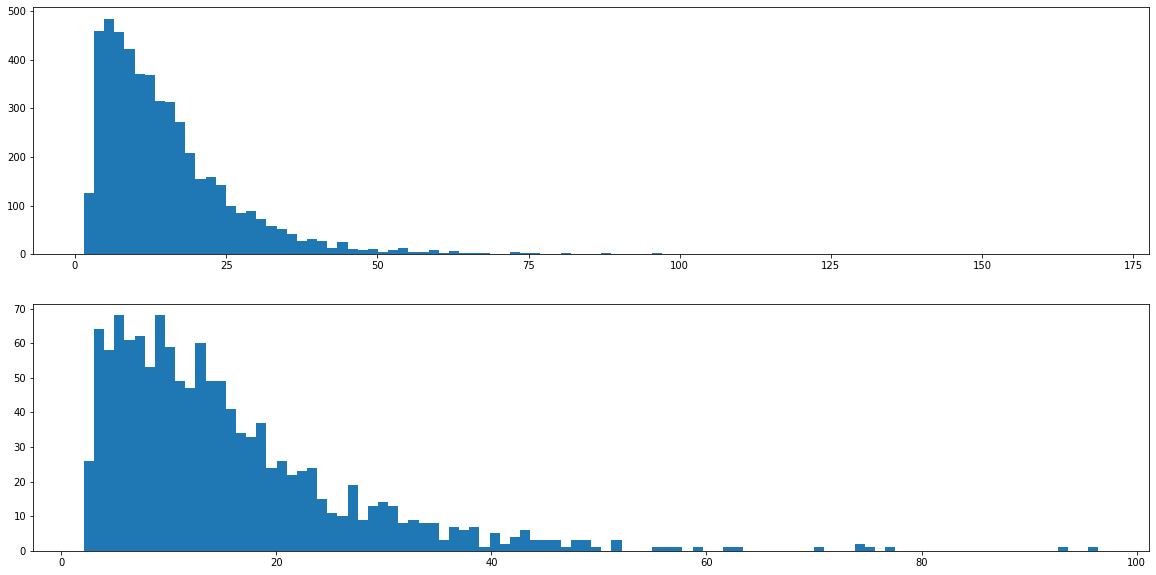

In [80]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.hist(train_df.duration, 100)
plt.subplot(2,1,2)
plt.hist(test_df.duration, 100)
plt.show()

In [85]:
train_df = train_df[train_df.duration < 50]
train_df.shape

(4907, 5)

In [88]:
test_df = test_df[test_df.duration < 50]
test_df.shape

(1231, 5)

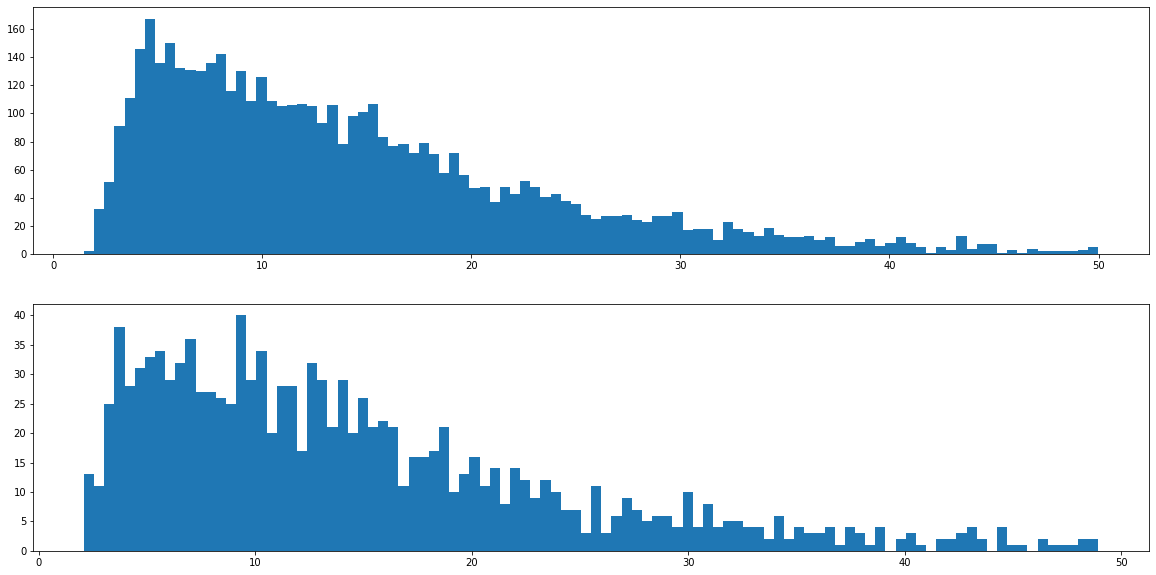

In [89]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.hist(train_df.duration, 100)
plt.subplot(2,1,2)
plt.hist(test_df.duration, 100)
plt.show()

In [90]:
train_df.to_json('data/persian-tts-train.json', lines=True, orient='records')
test_df.to_json('data/persian-tts-test.json', lines=True, orient='records')

## LJSpeech

In [54]:
path = '/media/data/soroosh/dataset/tts/LJSpeech-1.1/'
# df = pd.read_csv(path + 'metadata.csv', delimiter='|', names=['file', 'text_with_num', 'text_without_num'], header=None)
df = pd.read_csv(path + 'meta.csv')
df['sentence'] = df['text_without_num']
df = df[['path','sentence']]
print(df.shape)
df.head()

(13100, 2)


,file,text
0,LJ001-0001,"Printing, in the only sense with which we are ..."
1,LJ001-0002,in being comparatively modern.
2,LJ001-0003,For although the Chinese took impressions from...
3,LJ001-0004,"produced the block books, which were the immed..."
4,LJ001-0005,the invention of movable metal letters in the ...


In [55]:
# df['path'] = df['path'].apply(lambda x: path + 'wavs/' + x + '.wav')

In [63]:
def clean(t):
    for c in 'âàüéèê':
        if c in t:
            return ''

    t = t.replace('-', ' ')
    for c in '[]();.,:“”""?!' + "''":
        t = t.replace(c, '')
    return t
        
df['sentence'] = df['sentence'].apply(
    lambda x: clean(x.lower())
)

In [64]:
alphabet = set()
for t in df['sentence']:
    alphabet.update(list(t))
len(alphabet)

28

In [65]:
print(alphabet)

{'z', 'r', 'h', 's', 'b', 'i', '’', 'x', 'm', 'c', 'y', 'g', 't', 'j', ' ', 'q', 'o', 'n', 'w', 'a', 'v', 'k', 'u', 'l', 'p', 'f', 'e', 'd'}


In [66]:
df = df[df['sentence'] != '']
df.shape

(13081, 2)

In [68]:
df.head()

,file,text
0,/media/data/soroosh/dataset/tts/LJSpeech-1.1/w...,printing in the only sense with which we are a...
1,/media/data/soroosh/dataset/tts/LJSpeech-1.1/w...,in being comparatively modern
2,/media/data/soroosh/dataset/tts/LJSpeech-1.1/w...,for although the chinese took impressions from...
3,/media/data/soroosh/dataset/tts/LJSpeech-1.1/w...,produced the block books which were the immedi...
4,/media/data/soroosh/dataset/tts/LJSpeech-1.1/w...,the invention of movable metal letters in the ...


In [70]:
def get_dur(file):
    x, fs = librosa.load(file)
    return x.shape[0] / fs

df['duration'] = df['path'].progress_apply(get_dur)

  0%|          | 0/13081 [00:00<?, ?it/s]

In [71]:
df.head()

,file,text,duration
0,/media/data/soroosh/dataset/tts/LJSpeech-1.1/w...,printing in the only sense with which we are a...,9.655011
1,/media/data/soroosh/dataset/tts/LJSpeech-1.1/w...,in being comparatively modern,1.899546
2,/media/data/soroosh/dataset/tts/LJSpeech-1.1/w...,for although the chinese took impressions from...,9.666621
3,/media/data/soroosh/dataset/tts/LJSpeech-1.1/w...,produced the block books which were the immedi...,5.138730
4,/media/data/soroosh/dataset/tts/LJSpeech-1.1/w...,the invention of movable metal letters in the ...,8.110884


In [77]:
df.to_csv(path + 'meta.csv', index=False)

In [78]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.1)
train_df.to_json(path + 'train.json', lines=True, orient='records')
val_df.to_json(path + 'val.json', lines=True, orient='records')
train_df.shape, val_df.shape

((11772, 3), (1309, 3))

In [74]:
pickle.dump(sorted(list(alphabet)), open(path + 'alphabet.pkl', 'wb'))

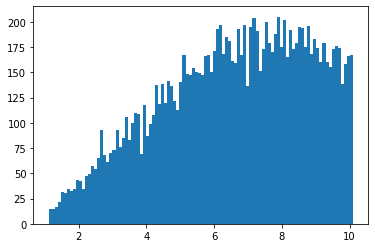

In [80]:
plt.hist(df['duration'], 100)
plt.show()

In [81]:
df['duration'].sum() / 3600

23.879753955656334